In [43]:
#pip install pandas numpy matplotlib statsmodels

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# def parser(x):
#     return datetime.strptime("190" + x, "%Y-%m")


# df = pd.read_csv("shampoo.csv",
#     header=0,
#     index_col=0,
#     parse_dates=True,
#     squeeze=True,
#     date_parser=parser,
# )

df = pd.read_csv("Shampoo_Sell.csv")
df.head()

,Month,Sale
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3


<Axes: >

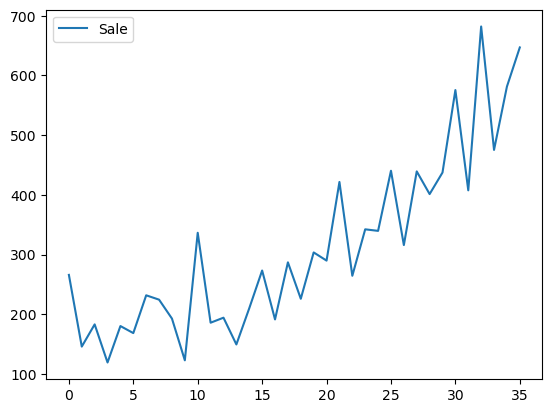

In [45]:
df.dropna()
df.plot()

<Axes: >

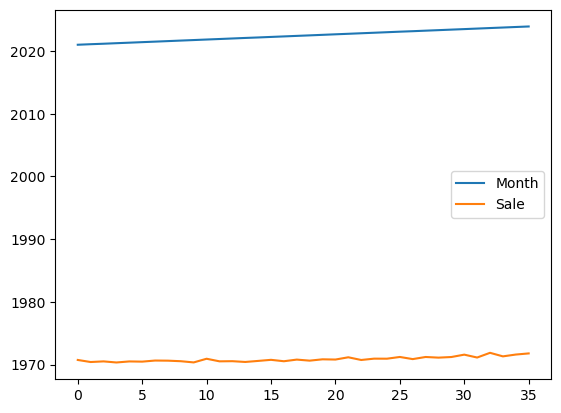

In [46]:
df["Month"] = pd.to_datetime(df["Month"])
df.plot()

In [47]:
df.head()

,Month,Sale
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3


In [48]:
df = df.set_index("Month")
df.head()


,Sale
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


<Axes: xlabel='Month'>

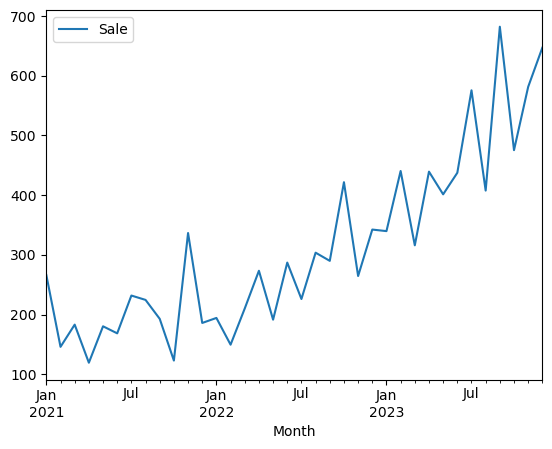

In [49]:
df.plot()

In [50]:
from statsmodels.tsa.stattools import adfuller

# test_result = adfuller(df["Sale"])
def adfulller_test(sale):
    result = adfuller(sale)
    if(result[1] < 0.05):
        print(f"p-value = {result[1]}, so the data is Stationary.")
    else:
        print(f"p-value = {result[1]}, so the data is Non-Stationary.")

In [51]:
adfulller_test(df["Sale"])

p-value = 1.0, so the data is Non-Stationary.


<Axes: xlabel='Month'>

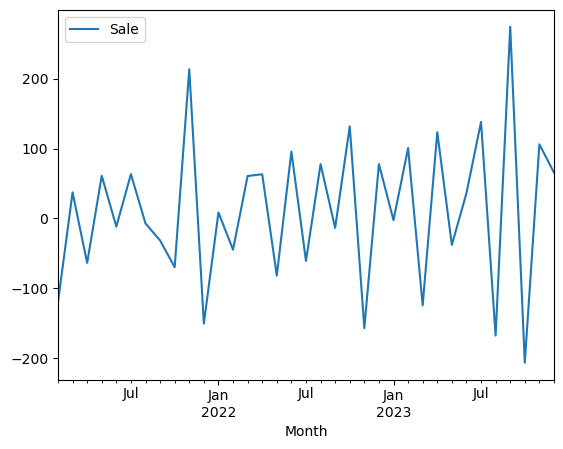

In [52]:
firstOrderDiff = df - df.shift(1) # shift moves the data down by 1
firstOrderDiff = firstOrderDiff.dropna()
firstOrderDiff.plot()

In [53]:
adfulller_test(firstOrderDiff["Sale"])
d = 1

p-value = 1.7998574141687034e-10, so the data is Stationary.


<Axes: xlabel='Month'>

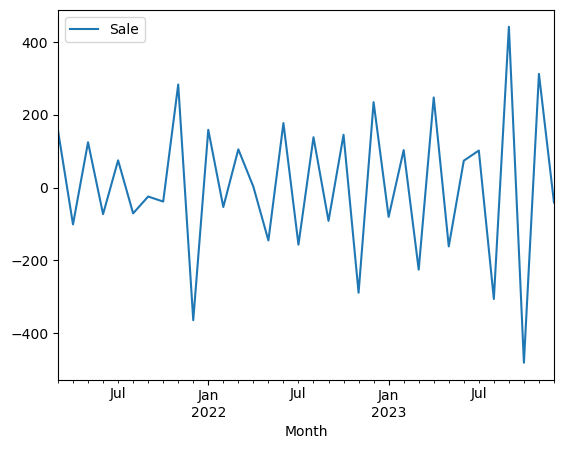

In [54]:
secondOrderDiff = firstOrderDiff - firstOrderDiff.shift(1)
secondOrderDiff = secondOrderDiff.dropna()
secondOrderDiff.plot()

In [55]:
adfulller_test(secondOrderDiff["Sale"])

p-value = 0.0039063349396599245, so the data is Stationary.


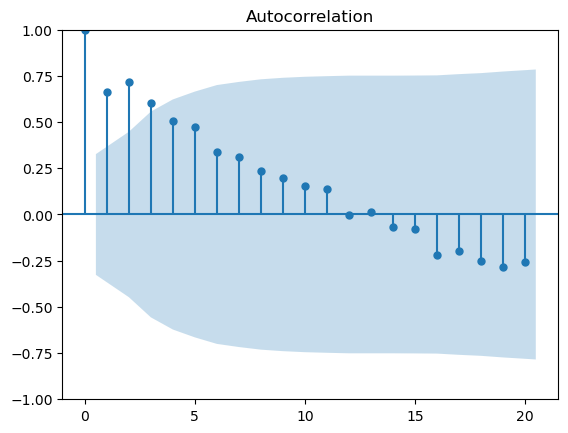

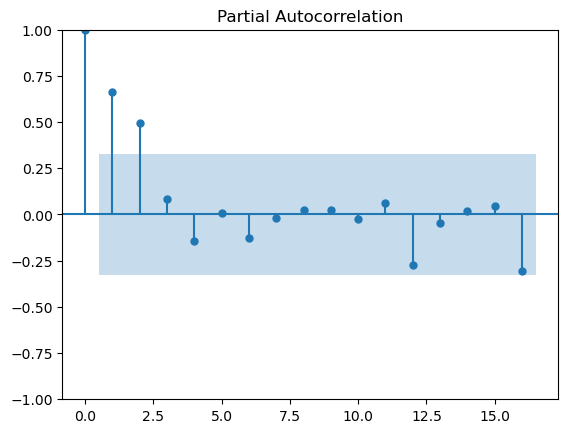

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
# plot_acf(df, lags=20, ax=ax1)
# plot_pacf(df, ax=ax2)

plot_acf(df, lags=20)
plot_pacf(df)
plt.show()

In [57]:
p = 2
q = 3

In [58]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.66)    # 66% of data is used for training
train = df[ : train_size]
test = df[train_size: ]

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   23
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -123.019
Date:                Thu, 25 Jan 2024   AIC                            258.038
Time:                        08:02:34   BIC                            264.585
Sample:                    01-01-2021   HQIC                           259.580
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0580      1.169      0.050      0.960      -2.233       2.349
ar.L2          0.7819      1.117      0.700      0.484      -1.407       2.971
ma.L1         -0.9858      1.358     -0.726      0.4

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
prediction = model_fit.predict(start=len(train), end=len(df)-1)
print(prediction)


2022-12-01    358.914924
2023-01-01    309.091835
2023-02-01    369.733278
2023-03-01    334.296560
2023-04-01    379.653684
2023-05-01    354.578399
2023-06-01    388.586465
2023-07-01    370.953976
2023-08-01    396.520480
2023-09-01    384.217496
2023-10-01    403.493087
2023-11-01    394.992076
2023-12-01    409.569638
Freq: MS, Name: predicted_mean, dtype: float64


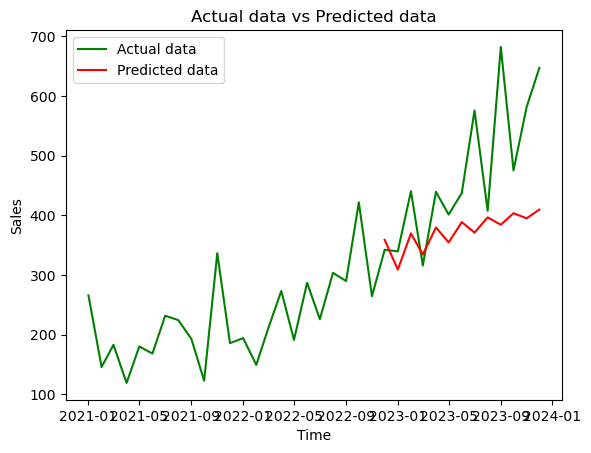

In [60]:
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.title("Actual data vs Predicted data")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [61]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order=(p,d,q), seasonal_order=(p,d,q,24))
model_fit = model.fit()
# print(model_fit.summary())

prediction = model_fit.predict(start=len(train), end=len(df)-1)
print(prediction)

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2022-12-01    264.500000
2023-01-01    397.500066
2023-02-01    277.400066
2023-03-01    314.600066
2023-04-01    250.800066
2023-05-01    311.800066
2023-06-01    300.000066
2023-07-01    363.300066
2023-08-01    356.000066
2023-09-01    324.300066
2023-10-01    254.400066
2023-11-01    468.000066
2023-12-01    317.400066
Freq: MS, Name: predicted_mean, dtype: float64


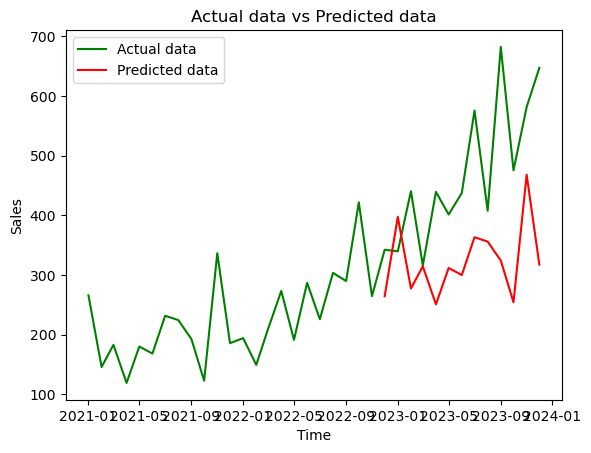

In [62]:
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.title("Actual data vs Predicted data")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

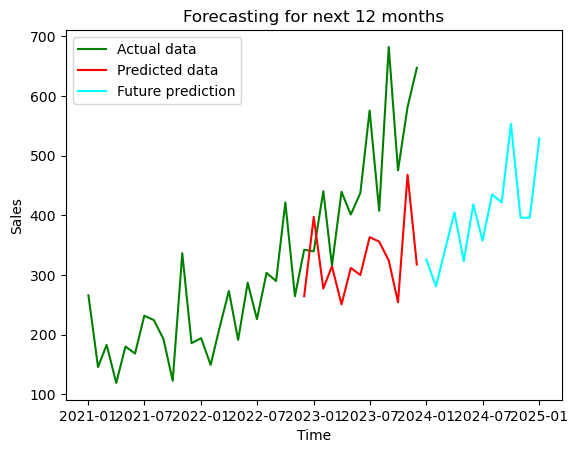

In [63]:
future_prediction = model_fit.predict(start=len(df),end=len(df)+12)
plt.plot(df, color='green', label= "Actual data")
plt.plot(prediction, color='red', label= "Predicted data")
plt.plot(future_prediction, color='cyan', label= "Future prediction")
plt.title("Forecasting for next 12 months")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show

In [64]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, prediction)
rmse = (mse)**0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 34171.54074275947
Root Mean Squared Error: 184.8554590558782
